# Multivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/03_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/03_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/03_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('../../../data/energy_generation_hourly_year.csv', index_col=0, parse_dates=True)
df

Coal  Cogeneration  Combined Cycle (Gas)     Eolic  \
time                                                                        
2022-09-01 00:00:00  695.00        1155.1             14748.950  4387.050   
2022-09-01 01:00:00  750.00        1162.1             14255.600  4008.900   
2022-09-01 02:00:00  777.50        1153.9             13644.750  3547.500   
2022-09-01 03:00:00  802.50        1146.0             13736.500  3188.650   
2022-09-01 04:00:00  816.25        1152.8             13706.825  2594.225   
...                     ...           ...                   ...       ...   
2023-08-31 19:00:00  472.50        2084.9              9390.275  2780.800   
2023-08-31 20:00:00  455.00        2141.1             10097.725  3072.800   
2023-08-31 21:00:00  509.10        2149.1             11359.425  3057.150   
2023-08-31 22:00:00  477.50        2153.4             10575.375  3057.950   
2023-08-31 23:00:00  500.00        2127.7              9988.875  3028.675   

                     Hydraulic  Non-Renewable Residues  Nuclear  \
time                                                              
2022-09-01 00:00:00    899.675                   273.7   6869.9   
2022-09-01 01:00:00    850.200                   271.6   6881.9   
2022-09-01 02:00:00    798.100                   272.6   6873.9   
2022-09-01 03:00:00    795.500                   273.0   6879.9   
2022-09-01 04:00:00    821.600                   271.7   6873.9   
...                        ...                     ...      ...   
2023-08-31 19:00:00   2335.900                   228.4   6853.0   
2023-08-31 20:00:00   3860.400                   230.9   6857.0   
2023-08-31 21:00:00   3852.325                   236.9   6864.0   
2023-08-31 22:00:00   3541.400                   239.4   6866.0   
2023-08-31 23:00:00   3159.500                   240.8   6869.0   

                     Pumped Storage Hydropower  Renewables Other  \
time                                                               
2022-09-01 00:00:00                    201.600           516.600   
2022-09-01 01:00:00                    117.700           514.400   
2022-09-01 02:00:00                     78.000           512.700   
2022-09-01 03:00:00                     78.000           512.500   
2022-09-01 04:00:00                     78.100           513.100   
...                                        ...               ...   
2023-08-31 19:00:00                   1611.600           493.575   
2023-08-31 20:00:00                   1910.850           500.600   
2023-08-31 21:00:00                   1343.375           505.100   
2023-08-31 22:00:00                    946.250           510.700   
2023-08-31 23:00:00                    334.950           511.900   

                     Solar Photovoltaic  Solar Thermal  
time                                                    
2022-09-01 00:00:00               1.000          287.7  
2022-09-01 01:00:00               1.000          247.7  
2022-09-01 02:00:00               1.200          239.7  
2022-09-01 03:00:00               0.200          209.7  
2022-09-01 04:00:00               0.400          231.5  
...                                 ...            ...  
2023-08-31 19:00:00            5212.173         1691.6  
2023-08-31 20:00:00             861.975         1039.1  
2023-08-31 21:00:00              21.400          668.8  
2023-08-31 22:00:00              17.600          607.9  
2023-08-31 23:00:00              17.400          619.8  

[8759 rows x 11 columns]

<Axes: xlabel='time'>

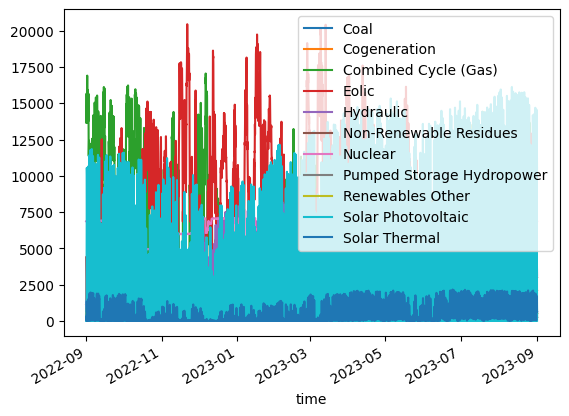

In [2]:
df.plot()

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<Axes: xlabel='time'>

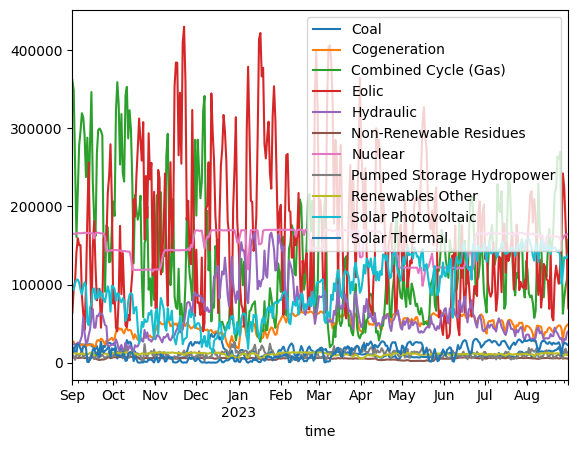

In [3]:
df.resample(rule='D').sum().plot()

### Monthly

<Axes: xlabel='time'>

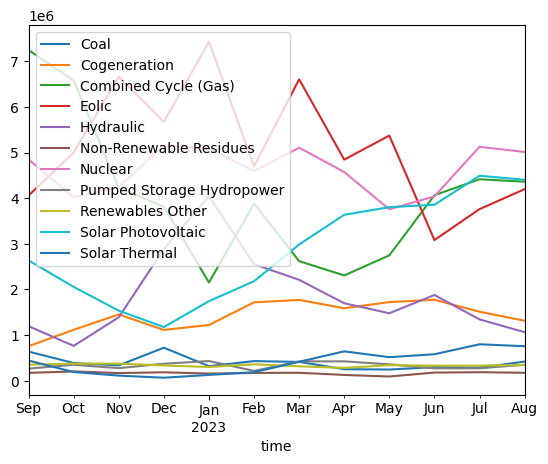

In [4]:
df.resample(rule='ME').sum().plot()

<Axes: xlabel='time'>

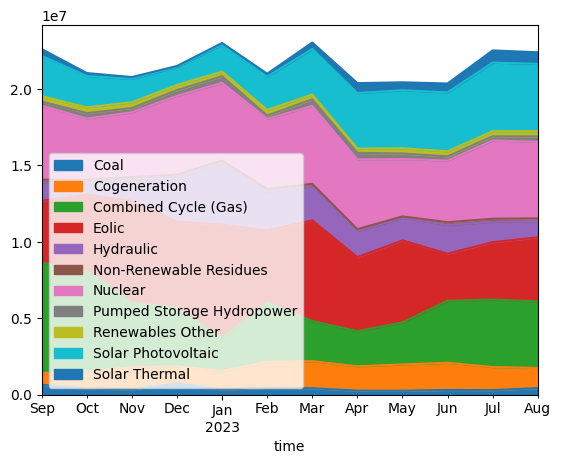

In [5]:
df.resample(rule='ME').sum().plot.area()

<Axes: xlabel='time'>

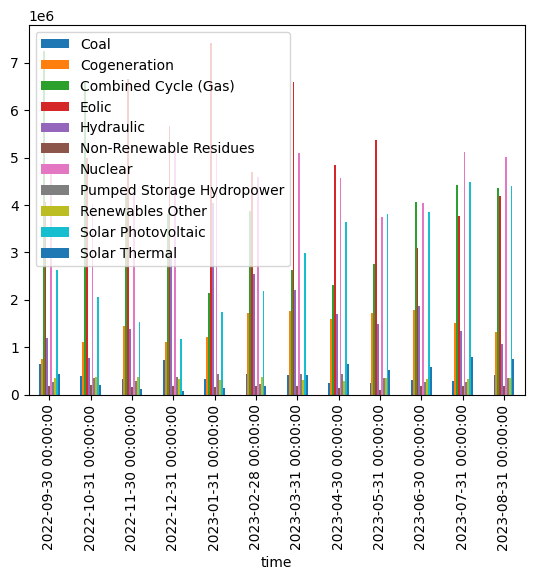

In [6]:
df.resample(rule='ME').sum().plot.bar()

In [7]:
df_sem = df.resample(rule='7D').sum()

## Visualize Time Series Correlation

In [8]:
df

Coal  Cogeneration  Combined Cycle (Gas)     Eolic  \
time                                                                        
2022-09-01 00:00:00  695.00        1155.1             14748.950  4387.050   
2022-09-01 01:00:00  750.00        1162.1             14255.600  4008.900   
2022-09-01 02:00:00  777.50        1153.9             13644.750  3547.500   
2022-09-01 03:00:00  802.50        1146.0             13736.500  3188.650   
2022-09-01 04:00:00  816.25        1152.8             13706.825  2594.225   
...                     ...           ...                   ...       ...   
2023-08-31 19:00:00  472.50        2084.9              9390.275  2780.800   
2023-08-31 20:00:00  455.00        2141.1             10097.725  3072.800   
2023-08-31 21:00:00  509.10        2149.1             11359.425  3057.150   
2023-08-31 22:00:00  477.50        2153.4             10575.375  3057.950   
2023-08-31 23:00:00  500.00        2127.7              9988.875  3028.675   

                     Hydraulic  Non-Renewable Residues  Nuclear  \
time                                                              
2022-09-01 00:00:00    899.675                   273.7   6869.9   
2022-09-01 01:00:00    850.200                   271.6   6881.9   
2022-09-01 02:00:00    798.100                   272.6   6873.9   
2022-09-01 03:00:00    795.500                   273.0   6879.9   
2022-09-01 04:00:00    821.600                   271.7   6873.9   
...                        ...                     ...      ...   
2023-08-31 19:00:00   2335.900                   228.4   6853.0   
2023-08-31 20:00:00   3860.400                   230.9   6857.0   
2023-08-31 21:00:00   3852.325                   236.9   6864.0   
2023-08-31 22:00:00   3541.400                   239.4   6866.0   
2023-08-31 23:00:00   3159.500                   240.8   6869.0   

                     Pumped Storage Hydropower  Renewables Other  \
time                                                               
2022-09-01 00:00:00                    201.600           516.600   
2022-09-01 01:00:00                    117.700           514.400   
2022-09-01 02:00:00                     78.000           512.700   
2022-09-01 03:00:00                     78.000           512.500   
2022-09-01 04:00:00                     78.100           513.100   
...                                        ...               ...   
2023-08-31 19:00:00                   1611.600           493.575   
2023-08-31 20:00:00                   1910.850           500.600   
2023-08-31 21:00:00                   1343.375           505.100   
2023-08-31 22:00:00                    946.250           510.700   
2023-08-31 23:00:00                    334.950           511.900   

                     Solar Photovoltaic  Solar Thermal  
time                                                    
2022-09-01 00:00:00               1.000          287.7  
2022-09-01 01:00:00               1.000          247.7  
2022-09-01 02:00:00               1.200          239.7  
2022-09-01 03:00:00               0.200          209.7  
2022-09-01 04:00:00               0.400          231.5  
...                                 ...            ...  
2023-08-31 19:00:00            5212.173         1691.6  
2023-08-31 20:00:00             861.975         1039.1  
2023-08-31 21:00:00              21.400          668.8  
2023-08-31 22:00:00              17.600          607.9  
2023-08-31 23:00:00              17.400          619.8  

[8759 rows x 11 columns]

<Axes: xlabel='Solar Photovoltaic', ylabel='Eolic'>

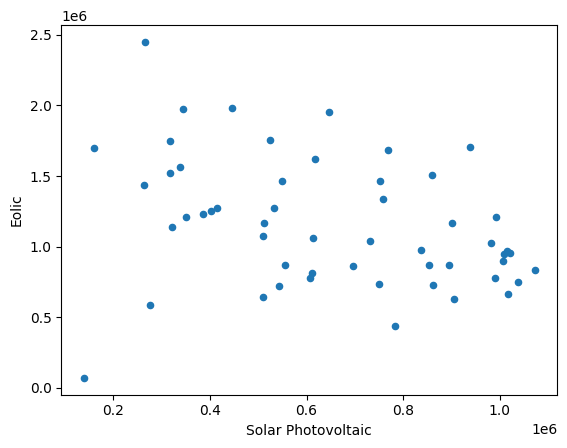

In [9]:
df_sem.plot.scatter(x='Solar Photovoltaic', y='Eolic')

<Axes: xlabel='Solar Photovoltaic', ylabel='Hydraulic'>

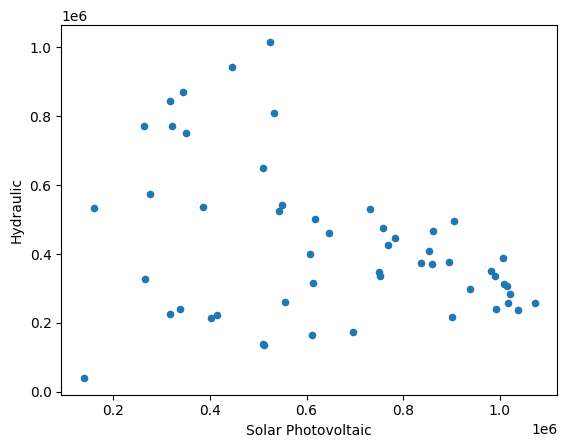

In [10]:
df_sem.plot.scatter(x='Solar Photovoltaic', y='Hydraulic')

## Correlation Matrix

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

### Scatter Matrix

In [11]:
import plotly.express as px

In [12]:
px.scatter_matrix(data_frame=df_sem)

In [13]:
px.scatter_matrix(data_frame=df_sem, height=800, width=1200)

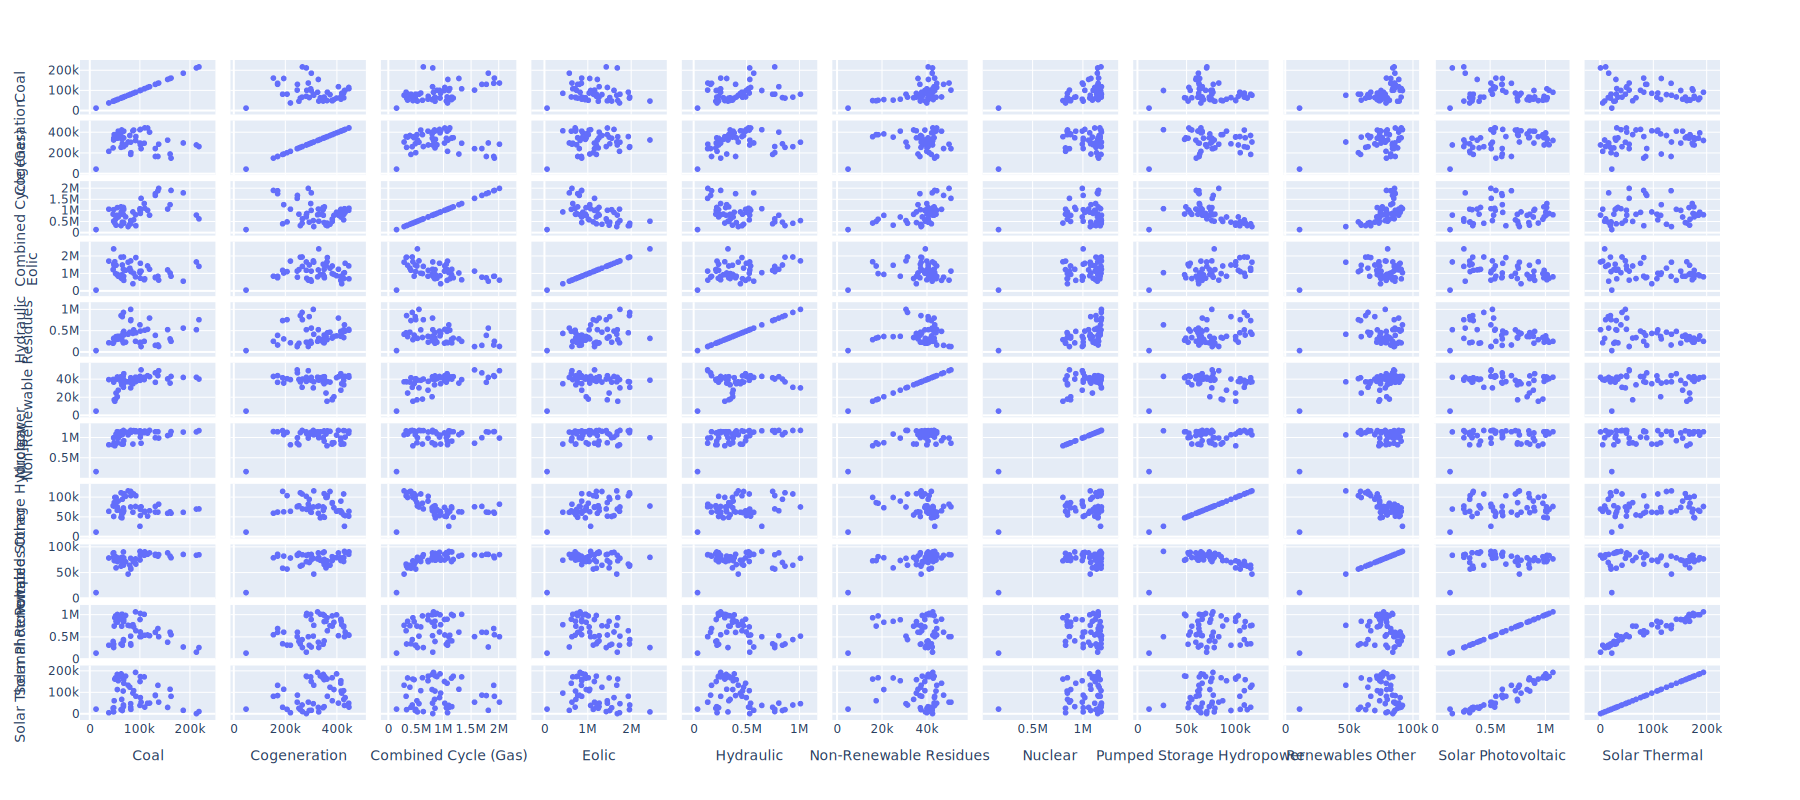

### Correlation Heatmap

In [14]:
dff=df_sem.corr()
dff

Coal  Cogeneration  Combined Cycle (Gas)  \
Coal                       1.000000     -0.188149              0.518225   
Cogeneration              -0.188149      1.000000             -0.182540   
Combined Cycle (Gas)       0.518225     -0.182540              1.000000   
Eolic                     -0.084500      0.070660             -0.438056   
Hydraulic                  0.172777      0.172892             -0.387845   
Non-Renewable Residues     0.463225      0.070449              0.535837   
Nuclear                    0.444694      0.181007              0.141589   
Pumped Storage Hydropower -0.141163      0.031765             -0.439755   
Renewables Other           0.445223      0.382826              0.597645   
Solar Photovoltaic        -0.296412      0.422146              0.002034   
Solar Thermal             -0.249978      0.244770             -0.001624   

                              Eolic  Hydraulic  Non-Renewable Residues  \
Coal                      -0.084500   0.172777                0.463225   
Cogeneration               0.070660   0.172892                0.070449   
Combined Cycle (Gas)      -0.438056  -0.387845                0.535837   
Eolic                      1.000000   0.399643               -0.027479   
Hydraulic                  0.399643   1.000000                0.074717   
Non-Renewable Residues    -0.027479   0.074717                1.000000   
Nuclear                    0.267217   0.452521                0.568764   
Pumped Storage Hydropower  0.453236   0.304919               -0.052955   
Renewables Other           0.052847  -0.011992                0.530340   
Solar Photovoltaic        -0.335556  -0.340156               -0.060634   
Solar Thermal             -0.344434  -0.397340               -0.088349   

                            Nuclear  Pumped Storage Hydropower  \
Coal                       0.444694                  -0.141163   
Cogeneration               0.181007                   0.031765   
Combined Cycle (Gas)       0.141589                  -0.439755   
Eolic                      0.267217                   0.453236   
Hydraulic                  0.452521                   0.304919   
Non-Renewable Residues     0.568764                  -0.052955   
Nuclear                    1.000000                   0.351624   
Pumped Storage Hydropower  0.351624                   1.000000   
Renewables Other           0.392212                  -0.245025   
Solar Photovoltaic         0.151145                   0.092960   
Solar Thermal              0.150533                   0.110195   

                           Renewables Other  Solar Photovoltaic  Solar Thermal  
Coal                               0.445223           -0.296412      -0.249978  
Cogeneration                       0.382826            0.422146       0.244770  
Combined Cycle (Gas)               0.597645            0.002034      -0.001624  
Eolic                              0.052847           -0.335556      -0.344434  
Hydraulic                         -0.011992           -0.340156      -0.397340  
Non-Renewable Residues             0.530340           -0.060634      -0.088349  
Nuclear                            0.392212            0.151145       0.150533  
Pumped Storage Hydropower         -0.245025            0.092960       0.110195  
Renewables Other                   1.000000            0.049405      -0.071333  
Solar Photovoltaic                 0.049405            1.000000       0.955715  
Solar Thermal                     -0.071333            0.955715       1.000000

In [16]:
px.imshow(img=dff, height=800, width=800, text_auto='.2f', color_continuous_scale='RdBu', zmin=-1, zmax=1)

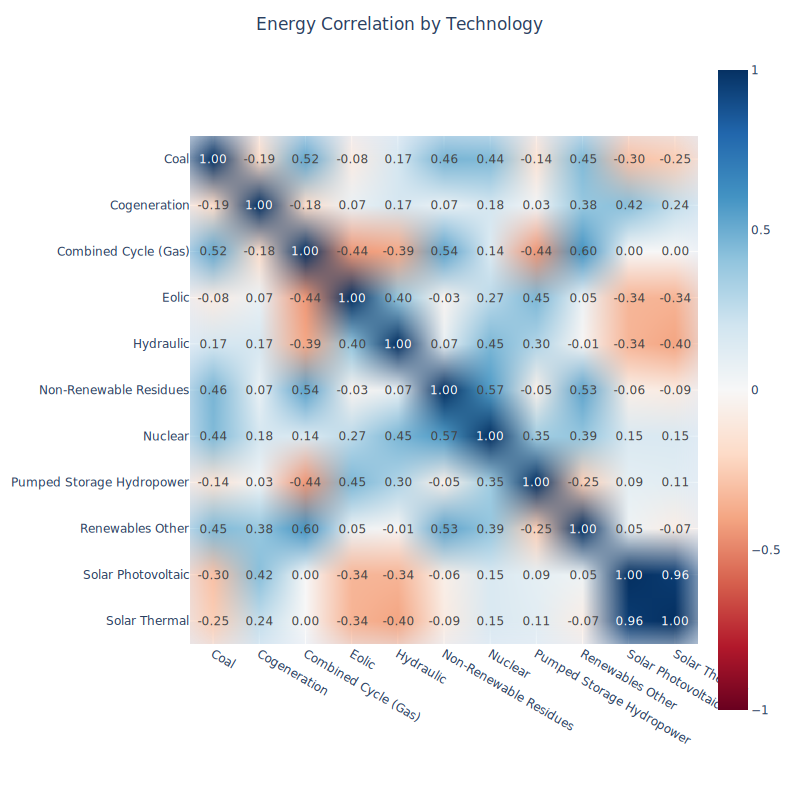

## Other Plots

In [17]:
px.line(data_frame=df_sem)

In [18]:
px.area(data_frame=df_sem)

In [20]:
px.bar(data_frame=df_sem)

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

In [21]:
df

Coal  Cogeneration  Combined Cycle (Gas)     Eolic  \
time                                                                        
2022-09-01 00:00:00  695.00        1155.1             14748.950  4387.050   
2022-09-01 01:00:00  750.00        1162.1             14255.600  4008.900   
2022-09-01 02:00:00  777.50        1153.9             13644.750  3547.500   
2022-09-01 03:00:00  802.50        1146.0             13736.500  3188.650   
2022-09-01 04:00:00  816.25        1152.8             13706.825  2594.225   
...                     ...           ...                   ...       ...   
2023-08-31 19:00:00  472.50        2084.9              9390.275  2780.800   
2023-08-31 20:00:00  455.00        2141.1             10097.725  3072.800   
2023-08-31 21:00:00  509.10        2149.1             11359.425  3057.150   
2023-08-31 22:00:00  477.50        2153.4             10575.375  3057.950   
2023-08-31 23:00:00  500.00        2127.7              9988.875  3028.675   

                     Hydraulic  Non-Renewable Residues  Nuclear  \
time                                                              
2022-09-01 00:00:00    899.675                   273.7   6869.9   
2022-09-01 01:00:00    850.200                   271.6   6881.9   
2022-09-01 02:00:00    798.100                   272.6   6873.9   
2022-09-01 03:00:00    795.500                   273.0   6879.9   
2022-09-01 04:00:00    821.600                   271.7   6873.9   
...                        ...                     ...      ...   
2023-08-31 19:00:00   2335.900                   228.4   6853.0   
2023-08-31 20:00:00   3860.400                   230.9   6857.0   
2023-08-31 21:00:00   3852.325                   236.9   6864.0   
2023-08-31 22:00:00   3541.400                   239.4   6866.0   
2023-08-31 23:00:00   3159.500                   240.8   6869.0   

                     Pumped Storage Hydropower  Renewables Other  \
time                                                               
2022-09-01 00:00:00                    201.600           516.600   
2022-09-01 01:00:00                    117.700           514.400   
2022-09-01 02:00:00                     78.000           512.700   
2022-09-01 03:00:00                     78.000           512.500   
2022-09-01 04:00:00                     78.100           513.100   
...                                        ...               ...   
2023-08-31 19:00:00                   1611.600           493.575   
2023-08-31 20:00:00                   1910.850           500.600   
2023-08-31 21:00:00                   1343.375           505.100   
2023-08-31 22:00:00                    946.250           510.700   
2023-08-31 23:00:00                    334.950           511.900   

                     Solar Photovoltaic  Solar Thermal  
time                                                    
2022-09-01 00:00:00               1.000          287.7  
2022-09-01 01:00:00               1.000          247.7  
2022-09-01 02:00:00               1.200          239.7  
2022-09-01 03:00:00               0.200          209.7  
2022-09-01 04:00:00               0.400          231.5  
...                                 ...            ...  
2023-08-31 19:00:00            5212.173         1691.6  
2023-08-31 20:00:00             861.975         1039.1  
2023-08-31 21:00:00              21.400          668.8  
2023-08-31 22:00:00              17.600          607.9  
2023-08-31 23:00:00              17.400          619.8  

[8759 rows x 11 columns]

### Time series categories in one column

technology  generation
time                                          
2022-09-01 00:00:00           Coal       695.0
2022-09-01 01:00:00           Coal       750.0
...                            ...         ...
2023-08-31 22:00:00  Solar Thermal       607.9
2023-08-31 23:00:00  Solar Thermal       619.8

[96349 rows x 2 columns]

### Create columns with datetime information

technology  generation  year  month  day  hour
time                                                                  
2022-09-01 00:00:00           Coal       695.0  2022      9    1     0
2022-09-01 01:00:00           Coal       750.0  2022      9    1     1
...                            ...         ...   ...    ...  ...   ...
2023-08-31 22:00:00  Solar Thermal       607.9  2023      8   31    22
2023-08-31 23:00:00  Solar Thermal       619.8  2023      8   31    23

[96349 rows x 6 columns]

### Process `pivot_table`

- Use this methodology.

year                       2022                                         \
month                        9            10           11           12   
technology                                                               
Coal                 639985.519   389282.273   338313.851   725039.354   
Cogeneration         758832.665  1117045.451  1453732.367  1114179.283   
...                         ...          ...          ...          ...   
Solar Photovoltaic  2636219.180  2056758.270  1535995.490  1176871.031   
Solar Thermal        443376.236   192219.608   113865.200    67765.475   

year                       2023                                         \
month                        1            2            3            4    
technology                                                               
Coal                 321210.350   431672.925   414233.325   254348.325   
Cogeneration        1222612.611  1718877.593  1771577.988  1590191.493   
...                         ...          ...          ...          ...   
Solar Photovoltaic  1744956.450  2181165.122  2985426.080  3635891.249   
Solar Thermal        129341.585   189183.825   416953.986   645285.245   

year                                                                    
month                        5            6            7            8   
technology                                                              
Coal                 247080.557   300360.567   287284.165   421115.277  
Cogeneration        1723153.516  1775275.345  1513263.491  1316018.962  
...                         ...          ...          ...          ...  
Solar Photovoltaic  3803151.814  3855930.011  4491017.672  4403223.582  
Solar Thermal        518091.793   581982.910   800023.053   757878.191  

[11 rows x 12 columns]

### Style DataFrame